In [ ]:
#import libraries
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
#load data
data = fashion_mnist.load_data()

In [ ]:
#split train and test data
(xtrain, ytrain), (xtest, ytest) = data

In [ ]:
print(f"(rows, columns) in xtrain = {xtrain.shape}")
print(f"(rows, columns) in xtest = {xtest.shape}")
print(f"values in ytrain = {ytrain.shape}")
print(f"values in ytest = {ytest.shape}")

(rows, columns) in xtrain = (60000, 28, 28)
(rows, columns) in xtest = (10000, 28, 28)
values in ytrain = (60000,)
values in ytest = (10000,)


/tmp/ipython-input-1008433371.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(xtrain[99])
/tmp/ipython-input-1008433371.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


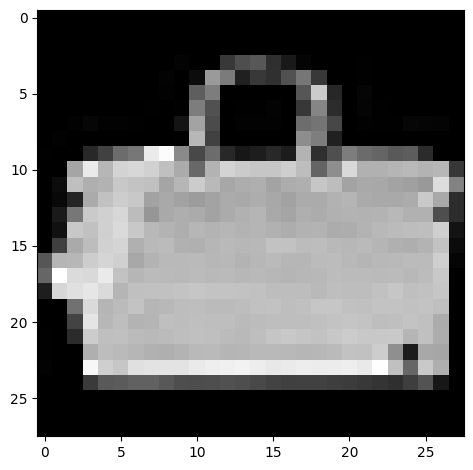

In [ ]:
# random imgae
from skimage import io
io.imshow(xtrain[99])
io.show()

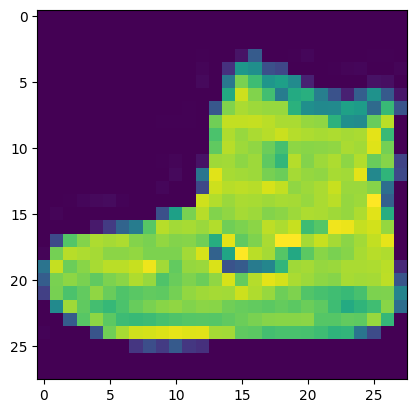

In [ ]:
#matplotlib image
import matplotlib.pyplot as plt

plt.imshow(xtrain[0])
plt.show()

In [ ]:
#construct model
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(units=600, activation='relu'))
model.add(Dense(units=300, activation = 'relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#combine the optimizer and loss
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model training
history = model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest), batch_size = 32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8615 - loss: 0.3585 - val_accuracy: 0.8583 - val_loss: 0.3908
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8658 - loss: 0.3398 - val_accuracy: 0.8477 - val_loss: 0.4053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8716 - loss: 0.3388 - val_accuracy: 0.8698 - val_loss: 0.3698
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8815 - loss: 0.3216 - val_accuracy: 0.8692 - val_loss: 0.3961
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8879 - loss: 0.3118 - val_accuracy: 0.8656 - val_loss: 0.3751


In [ ]:
history.history

{'accuracy': [0.8593833446502686,
  0.8551833629608154,
  0.8769500255584717,
  0.8810666799545288,
  0.8865000009536743],
 'loss': [0.36098363995552063,
  0.35174018144607544,
  0.33707287907600403,
  0.3234618902206421,
  0.3160770535469055],
 'val_accuracy': [0.858299970626831,
  0.8476999998092651,
  0.8697999715805054,
  0.8691999912261963,
  0.8655999898910522],
 'val_loss': [0.39078813791275024,
  0.4052762985229492,
  0.3698328733444214,
  0.396053284406662,
  0.3750912547111511]}

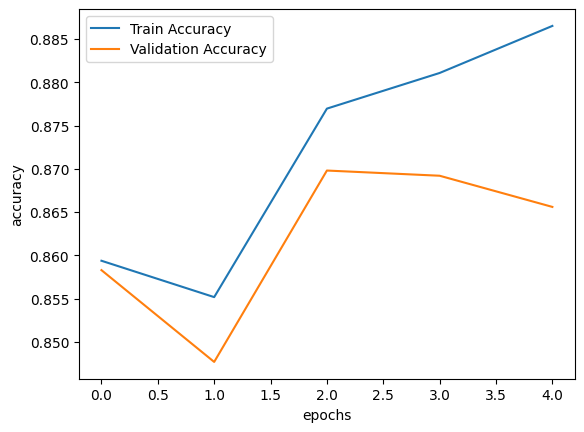

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [ ]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8651 - loss: 0.3801
Test Accuracy: 0.8655999898910522


In [ ]:
#prediction
y_pred_prob = model.predict(xtest)
y_pred_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.9199836e-10, 5.2501052e-09, 2.5431484e-08, ..., 7.9592329e-01,
        4.3596528e-04, 9.9762923e-01],
       [6.1174327e-01, 2.4188774e-05, 1.0000000e+00, ..., 1.6427868e-17,
        3.1139007e-06, 3.7724432e-14],
       [4.9143434e-10, 1.0000000e+00, 2.1102427e-23, ..., 5.5319771e-28,
        1.3813000e-29, 8.3949772e-35],
       ...,
       [7.2353786e-01, 9.9699851e-03, 2.7569805e-04, ..., 8.3094537e-06,
        9.9999976e-01, 3.8554595e-07],
       [2.1901104e-05, 1.0000000e+00, 1.6007622e-12, ..., 1.8628025e-29,
        1.7528020e-20, 7.2755284e-29],
       [4.2576313e-02, 6.0380115e-03, 9.0955440e-03, ..., 8.0204248e-01,
        3.0498832e-01, 7.3001122e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred_prob, axis = 1)


In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
ytrain_pred = np.argmax(model.predict(xtrain), axis = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

check perfomance matrix

In [ ]:
print(confusion_matrix(ytest, y_pred ))

[[760   1  21  40   2   0 174   0   2   0]
 [  5 955   0  30   2   1   6   0   1   0]
 [ 12   0 818  13  57   0 100   0   0   0]
 [ 16   1   9 907  17   0  50   0   0   0]
 [  0   0 149  59 667   0 122   0   3   0]
 [  0   0   0   0   0 939   0  32   3  26]
 [ 92   1 100  24  45   0 732   0   6   0]
 [  0   0   0   0   0   6   0 962   0  32]
 [  8   0   3   8   1   0  19   4 957   0]
 [  0   0   0   0   0   6   1  34   0 959]]


In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1000
           1       1.00      0.95      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.84      0.91      0.87      1000
           4       0.84      0.67      0.74      1000
           5       0.99      0.94      0.96      1000
           6       0.61      0.73      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
test_accuracy = accuracy_score(ytest, y_pred)
train_accuracy = accuracy_score(ytrain, ytrain_pred)

In [ ]:
if train_accuracy > test_accuracy + .1 :
    print (' model is overfit')
elif train_accuracy < .6 :
    print('model is underfit')
else :
    print (' model is goodfit')

 model is goodfit


In [ ]:
model.save('model.keras')